In [132]:
import sklearn 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from LLS import LLs
from scipy import stats
import seaborn as sns

In [138]:
data = pd.read_csv ('dataset\Boston.csv')
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [144]:

data.drop(data.columns[[0]], axis=1, inplace=True)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


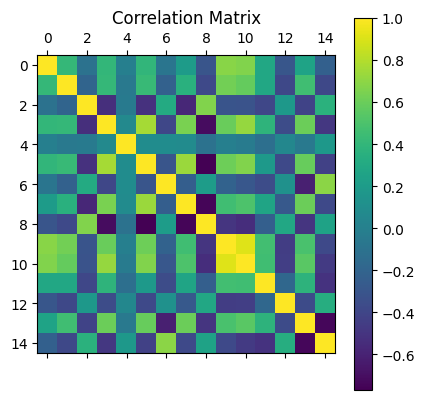

In [128]:
# plt.matshow(data.corr())
# cb = plt.colorbar()
# plt.title('Correlation Matrix', fontsize=12);

<Axes: >

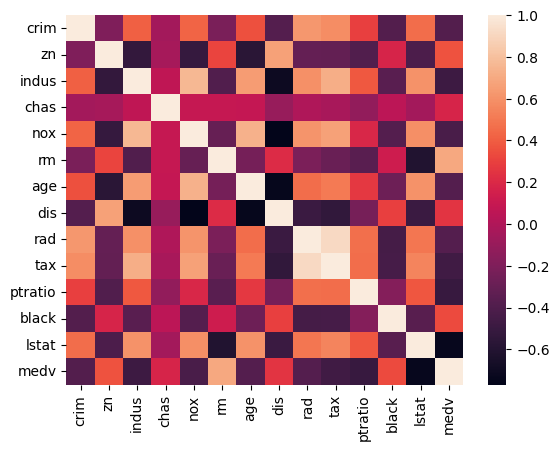

In [145]:
sns.heatmap(data.corr())

In [122]:
X = np.array (data [['indus','rad']])
X = np.array((data['indus'],data['rad']))
Y = np.array(data ['tax'])
print(X.shape)
print(Y.shape)

(506, 2)
(506,)


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, train_size = .8)


In [47]:
lls = LLs()
a = lls.fit(X_train, y_train)


In [48]:
a

array([18.03830748, 15.9968641 ])

In [56]:
y_pred = lls.predict(X_test)

In [57]:
# slope, intercept, r, p, std_err = stats.linregress(X, Y)

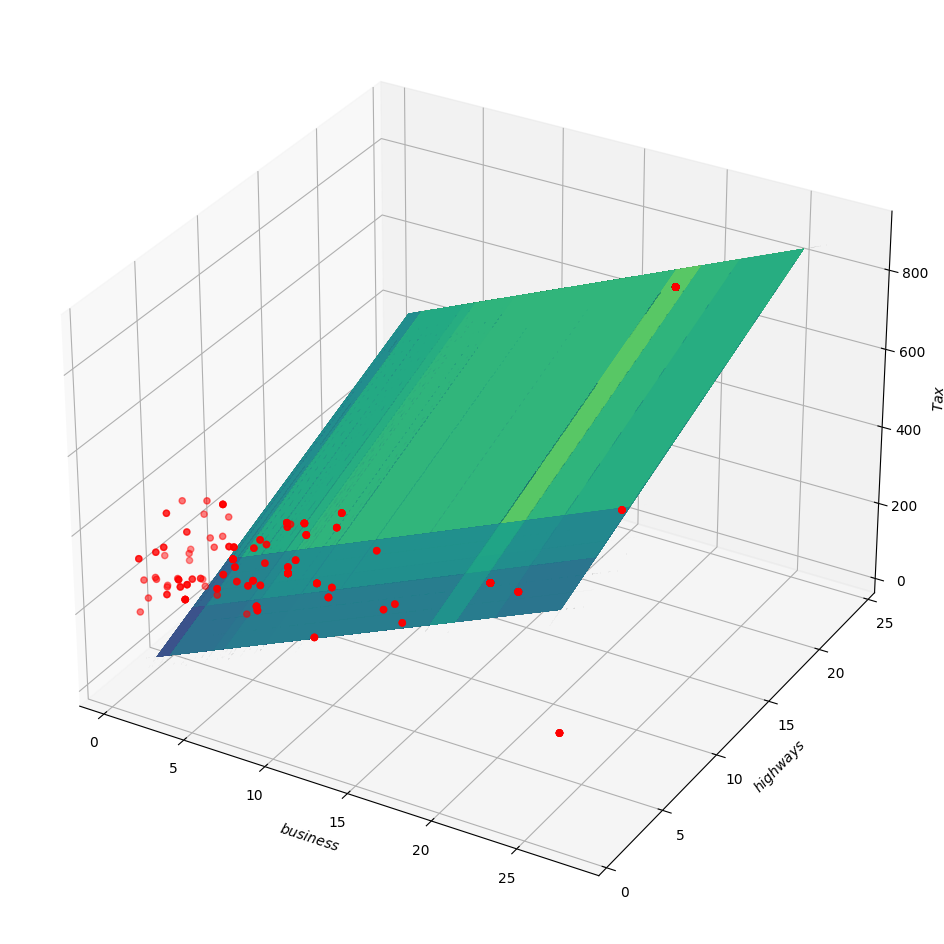

<Figure size 640x480 with 0 Axes>

In [151]:
X1 = X_train[:,0]
X2 = X_train[:,1]
fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')
ax.scatter(X1, X2, y_train, c='red')
ax.set_xlabel('$business$', fontsize=10)
ax.set_ylabel('$highways$', fontsize=10)
ax.set_zlabel('$Tax$', fontsize=10)
x1, x2 = np.meshgrid(X1, X2)
surface = x1 * a[0] + x2 * a[1] 
ax.plot_surface(x1, x2, surface, cmap = "viridis")
plt.show()
plt.savefig('3d_plot.jpg')